# **Introduction**

In this section, I explore the basic building blocks of a quantum program. I have used [this](https://qiskit.org/textbook/ch-states/introduction.html) website as a reference. 

In [ ]:
!pip install qiskit

In [ ]:
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

# **Importing libraries**

In [ ]:
import qiskit.tools.jupyter
from qiskit_textbook.widgets import binary_widget
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi


Splitting information into bits

In [ ]:
binary_widget(nbits=5)


HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

Now, we will build our first quantum circuit

In [ ]:
qc_output = QuantumCircuit(8)
qc_output.measure_all()
qc_output.draw(initial_state=True) 


░ ┌─┐                     
  q_0: |0>─░─┤M├─────────────────────
           ░ └╥┘┌─┐                  
  q_1: |0>─░──╫─┤M├──────────────────
           ░  ║ └╥┘┌─┐               
  q_2: |0>─░──╫──╫─┤M├───────────────
           ░  ║  ║ └╥┘┌─┐            
  q_3: |0>─░──╫──╫──╫─┤M├────────────
           ░  ║  ║  ║ └╥┘┌─┐         
  q_4: |0>─░──╫──╫──╫──╫─┤M├─────────
           ░  ║  ║  ║  ║ └╥┘┌─┐      
  q_5: |0>─░──╫──╫──╫──╫──╫─┤M├──────
           ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
  q_6: |0>─░──╫──╫──╫──╫──╫──╫─┤M├───
           ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
  q_7: |0>─░──╫──╫──╫──╫──╫──╫──╫─┤M├
           ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 0 8/════╩══╩══╩══╩══╩══╩══╩══╩═
              0  1  2  3  4  5  6  7

The following code plots a histogram for the different outputs observed for this quantum circuit

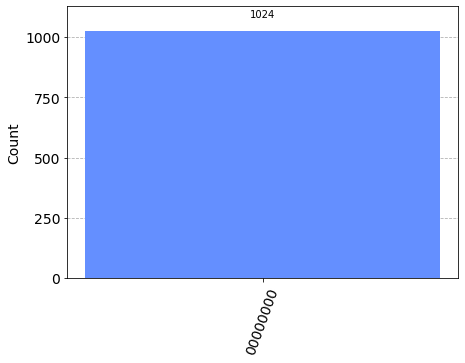

In [ ]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)


Now, we alter only one the last qubit using a NOT gate

In [ ]:
qc_encode = QuantumCircuit(8)
qc_encode.x(7)
qc_encode.draw()


q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

In [ ]:
qc_encode.measure_all()
qc_encode.draw()


░ ┌─┐                     
   q_0: ──────░─┤M├─────────────────────
              ░ └╥┘┌─┐                  
   q_1: ──────░──╫─┤M├──────────────────
              ░  ║ └╥┘┌─┐               
   q_2: ──────░──╫──╫─┤M├───────────────
              ░  ║  ║ └╥┘┌─┐            
   q_3: ──────░──╫──╫──╫─┤M├────────────
              ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ──────░──╫──╫──╫──╫─┤M├─────────
              ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ──────░──╫──╫──╫──╫──╫─┤M├──────
              ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ──────░──╫──╫──╫──╫──╫──╫─┤M├───
        ┌───┐ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/═════════╩══╩══╩══╩══╩══╩══╩══╩═
                 0  1  2  3  4  5  6  7

Again, measuring the frequencies of different outcomes

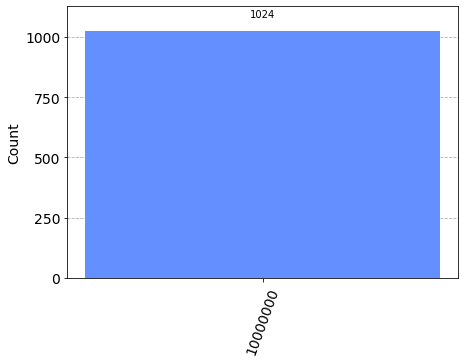

In [ ]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)


# CNOT

In [ ]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()


q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [ ]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()


┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

# Half-Adder

In [ ]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()


┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

Now, let's calculate 1+1 (i.e. setting both input bits to 1)

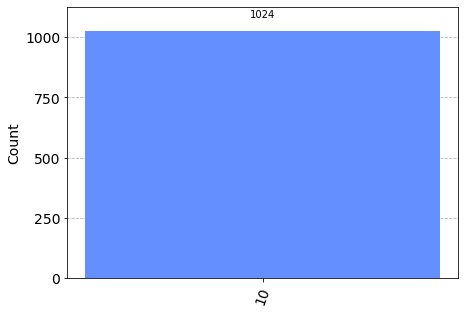

In [ ]:
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)


Here is a simple version checking command for qiskit

In [ ]:
%qiskit_version_table


# **Qubits**

Here, we shall explore representation of single qubit states and the representation of quantum gates

In [ ]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw()  # Let's view our circuit


┌─────────────────┐
q: ┤ Initialize(0,1) ├
   └─────────────────┘

In [ ]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit


In [ ]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.save_statevector()   # Tell simulator to save statevector
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result


In [ ]:
out_state = result.get_statevector()
print(out_state) # Display the output state vector


Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [ ]:
qc.measure_all()
qc.draw()


┌─────────────────┐ statevector  ░ ┌─┐
     q: ┤ Initialize(0,1) ├──────░───────░─┤M├
        └─────────────────┘      ░       ░ └╥┘
meas: 1/════════════════════════════════════╩═
                                            0

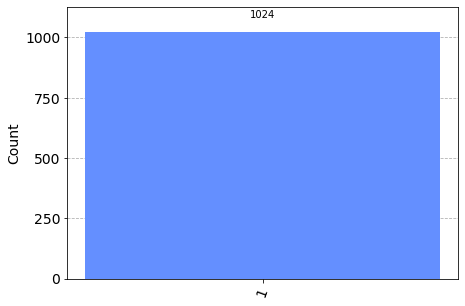

In [ ]:
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)
